<a href="https://colab.research.google.com/github/truongtop14/Codeshool-DataScientist/blob/master/Copy_of_DAwP_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://i.imgur.com/0AUxkXt.png)

# SF Salaries Exercise 

Explore San Francisco city employee salary data.

## Overview

One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.



Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

## Resourses

[Pandas API Reference](https://pandas.pydata.org/pandas-docs/stable/api.html)

[NumPy Reference](https://docs.scipy.org/doc/numpy/reference/)

[Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)


**Import libraries**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read `Salaries.csv` as a dataframe called `sal`.**

In [0]:
link = "https://s3-ap-southeast-1.amazonaws.com/intro-to-ml-minhdh/Salaries.csv"
sal = pd.read_csv(link)

**Check the head of the DataFrame.**

In [3]:
sal.head(6)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN


**Use the .info() method to find out how many entries there are.**

In [4]:
temp_info = sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**What is the average BasePay ?**

Keyword: [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)

In [5]:
sal['BasePay'].mean()

66325.44884050643

**What is the lowest and highest amount of BasePay?**

Keyword: 
[min](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html) , 
[max](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)

In [6]:
sal['BasePay'].min()

-166.01

In [7]:
sal['BasePay'].max()

319275.01

**How about OvertimePay in the dataset? What is the average, lowest, highest amount?**

In [8]:

[sal['OvertimePay'].mean(), sal['OvertimePay'].min(), sal['OvertimePay'].max() ]

[5066.059886444622, -0.01, 245131.88]

In [9]:
sal.isnull().any()

Id                  False
EmployeeName        False
JobTitle            False
BasePay              True
OvertimePay          True
OtherPay             True
Benefits             True
TotalPay            False
TotalPayBenefits    False
Year                False
Notes                True
Agency              False
Status               True
dtype: bool

**What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).**

In [10]:
# Now try to select Employees who have name "GARY JIMENEZ"
# Your code here
sal[sal['EmployeeName'] == "GARY JIMENEZ"]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN


**How much does JOSEPH DRISCOLL make (including benefits)?**

In [11]:
sal[(sal['EmployeeName'] == "GARY JIMENEZ")].TotalPayBenefits

1    538909.28
Name: TotalPayBenefits, dtype: float64

**What is the name of highest paid person (including benefits)?**

In [12]:
highest_paid = sal[(sal['TotalPayBenefits'] == sal['TotalPayBenefits'].max())]
highest_paid.EmployeeName

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

**What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [13]:
lowest_paid = sal[(sal['TotalPayBenefits'] == sal['TotalPayBenefits'].min())]
lowest_paid.EmployeeName

148653    Joe Lopez
Name: EmployeeName, dtype: object

**What was the average (mean) BasePay of all employees per year? (2011-2014) ?**
Keyword: _groupby_

In [14]:
year_sal = sal.groupby('Year')
year_sal['BasePay'].mean()

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

**How many unique job titles are there?**

Keyword: _unique, nunique_

In [15]:
sal['JobTitle'].get_dtype_counts

<bound method NDFrame.get_dtype_counts of 0           GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1                          CAPTAIN III (POLICE DEPARTMENT)
2                          CAPTAIN III (POLICE DEPARTMENT)
3                     WIRE ROPE CABLE MAINTENANCE MECHANIC
4             DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)
5                                ASSISTANT DEPUTY CHIEF II
6                       BATTALION CHIEF, (FIRE DEPARTMENT)
7                           DEPUTY DIRECTOR OF INVESTMENTS
8                       BATTALION CHIEF, (FIRE DEPARTMENT)
9                   CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)
10        ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)
11                         CAPTAIN III (POLICE DEPARTMENT)
12                             EXECUTIVE CONTRACT EMPLOYEE
13                                       DEPARTMENT HEAD V
14                      BATTALION CHIEF, (FIRE DEPARTMENT)
15                      COMMANDER III, (POLICE DEPARTMENT)
16            

In [16]:
sal['JobTitle'].nunique()

2159

**What are the top 5 most common jobs?**

Keyword: *value_counts*

In [17]:
most_job = sal['JobTitle'].value_counts()
most_job.head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

**How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)**

In [18]:
(sal.loc[(sal['Year'] == 2013),'JobTitle'].value_counts() == 1).sum()

202

In [19]:
(sal[sal['Year'] == 2013]['JobTitle'].value_counts() == 1).sum()



202



```
# This is formatted as code
```

**How many people have the word Chief in their job title?**

In [20]:
def find_chief(job_title):
  if 'chief' in job_title.lower():
    return True
  else:
    return False
  
sal['JobTitle'].apply(lambda x: find_chief(x)).sum()

627

## Data Visualization

**Implement seaborn's countplot with x='Year'**

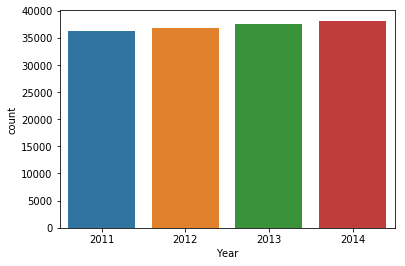

In [21]:
plot = sns.countplot(data = sal, x='Year')

**Implement seaborn's distplot for BasePay of Year 2011**

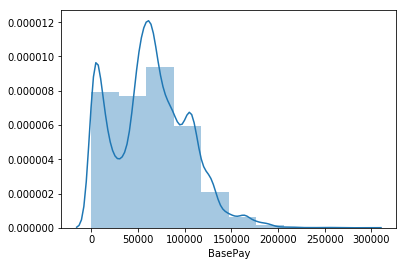

In [22]:
year_sal = sal[sal['Year'] == 2011]
plot = sns.distplot(year_sal['BasePay'], bins = 10)

**How about other Year**

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


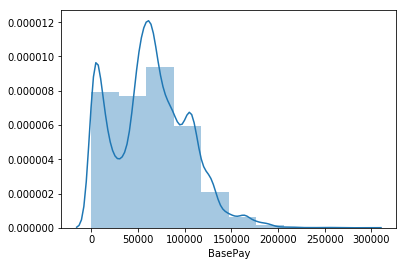

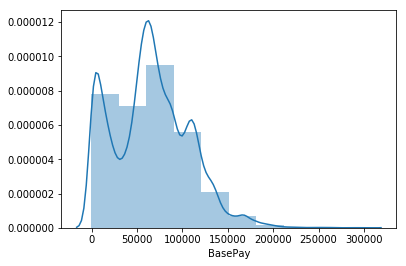

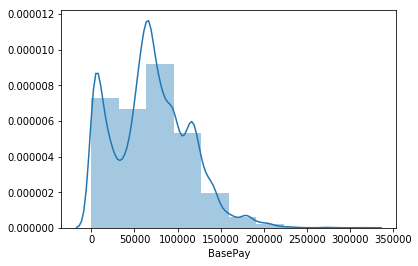

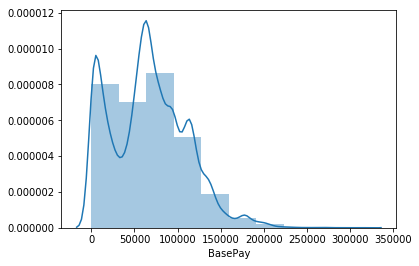

In [23]:
for index in range(2011, 2015):
  fig = plt.figure()
  year_sal = sal[sal['Year'] == index]
  plot = sns.distplot(year_sal['BasePay'], bins = 10)

## Bonus

**Visualize top 5 Jobs with BasePay, Benefits and OvertimePay**

Keyword: *index, isin, groupby, mean, plot*

In [24]:

basepay_sal = sal.groupby('JobTitle')['BasePay'].mean()
most_basepay = basepay_sal.sort_values(ascending = False)
five_most_basepay = most_basepay.head(5)
five_most_basepay

JobTitle
Chief of Police                           309767.683333
Chief, Fire Department                    304232.340000
Gen Mgr, Public Trnsp Dept                297769.413333
CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)    285262.000000
Dep Dir for Investments, Ret              276153.765000
Name: BasePay, dtype: float64

[]

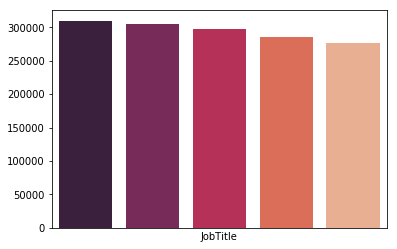

In [25]:

ax = sns.barplot(x = five_most_basepay.index, y = five_most_basepay.values, palette="rocket")
ax.set_xticks([])


In [26]:
benefit_sal = sal.groupby('JobTitle')['Benefits'].mean()
most_basepay = benefit_sal.sort_values(ascending = False)
five_most_benefit = most_basepay.head(5)
five_most_benefit

JobTitle
Chief Investment Officer      96570.660000
Gen Mgr, Public Trnsp Dept    82927.026667
Chief, Fire Department        82893.643333
Chief of Police               82548.620000
Mayor                         78360.376667
Name: Benefits, dtype: float64

[]

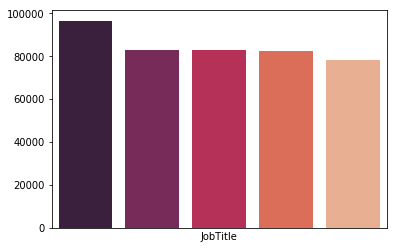

In [27]:
ax = sns.barplot(x = five_most_benefit.index, y = five_most_benefit.values, palette="rocket")
ax.set_xticks([])


In [32]:
overtimepay_sal = sal.groupby('JobTitle')['OvertimePay'].mean()
most_overtimepay = overtimepay_sal.sort_values(ascending = False)
five_most_overtimepay = most_overtimepay.head(5)
five_most_overtimepay

JobTitle
Wire Rope Cable Maint Sprv                82446.923333
WIRE ROPE CABLE MAINTENANCE SUPERVISOR    66164.730000
Trnst Power Line Wrk Sprv 2               59259.306667
Track Maint Wrk Sprv 1                    50613.903478
Incident Support Specialist               50596.387143
Name: OvertimePay, dtype: float64

[]

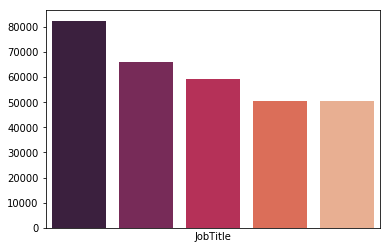

In [33]:
ax = sns.barplot(x = five_most_overtimepay.index, y = five_most_overtimepay.values, palette="rocket")
ax.set_xticks([])

**Fun Fact: Is there a correlation between length of the Job Title string and Salary?**

*Hint: corr()*

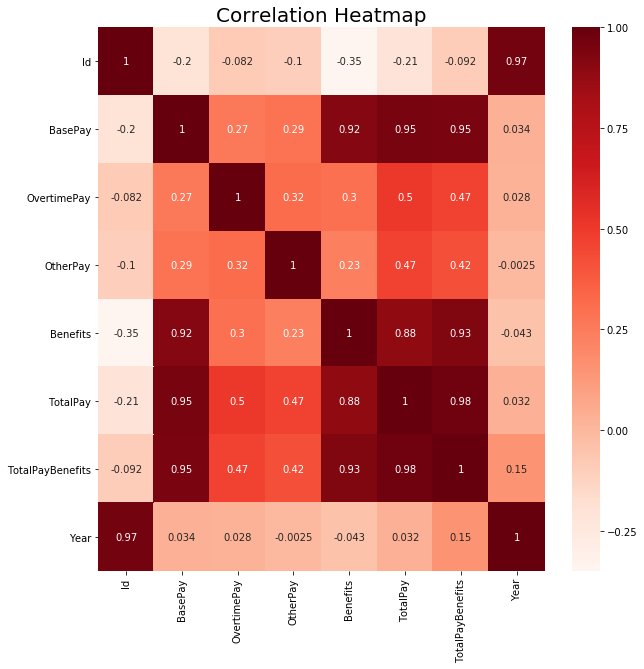

In [36]:

plt.figure(figsize=(10,10))
tem_sal = sal.drop(['Notes','Status'], axis = 1)
ax = sns.heatmap(tem_sal.corr(), annot=True, cmap="Reds")
title = plt.title('Correlation Heatmap', fontsize=20)

# Great Job!